In [1]:
# Load data
from contradictory_claims.models.evaluate_model import read_data_from_excel


roam_path = "/Users/dnsosa/Downloads/Coronawhy-Contra-Claims-Scaling-v2-annotated-2020-10-21.xlsx"
roam_data = read_data_from_excel(roam_path, "Docs")

Length of DF: 1002
Dropped NAs. Resulting length of DF: 996


In [2]:
def process_text(s):
    s = s.replace("Claim1:\n\n", "")
    return s.split("\n\nClaim2:\n\n")

def normalize_tags(s):
    s = s.replace("STRICT_", "")
    return s.lower()

##df['example'] = df['text'].apply(process_text)

roam_data['label'] = roam_data['tags'].apply(normalize_tags)
roam_data = roam_data[~roam_data['label'].str.contains("question|duplicate")]

In [3]:
def splitter(in_str, index):
    text1 = in_str.rstrip().split("\n\n")[index]
    return text1

roam_data["text1"] = roam_data.text.transform(lambda x: splitter(x, 1))
roam_data["text2"] = roam_data.text.transform(lambda x: splitter(x, 3))

In [4]:
roam_data.head(10)

,tags,source,text,row_id,paper1_cord_uid,paper2_cord_uid,label,text1,text2
0,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nchloroquine has been recommended by...,323,rc5bn6jc,sdij1d90,neutral,chloroquine has been recommended by some autho...,on the basis of hydroxychloroquine's superior ...
1,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\n15 our regression model identified ...,413,36amafub,rirbffi6,neutral,15 our regression model identified age as a de...,these findings formed the basis of a recent ra...
2,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nn/a fax: +90 322 458 88 54 inhibiti...,431,1emlkii0,27f9241x,neutral,n/a fax: +90 322 458 88 54 inhibition of the r...,we observed weak but beneficial class effects ...
3,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\nin addition, a case report showed t...",97,iua7twk5,1mjaycee,entailment,"in addition, a case report showed that remdesi...","remdesivir, lopinavir, ritonavir, and oseltami..."
4,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\nfurthermore, despite the favorable ...",14,v17l6t5u,kmzum2a9,entailment,"furthermore, despite the favorable outcomes of...",it is important to underline that the immunomo...
5,CONTRADICTION,Demo-Annotations_43573ac3-R1,Claim1:\n\nword count: 248 take home: this stu...,967,2f6nj4to,n6juf8tw,contradiction,word count: 248 take home: this study demonstr...,"similarly, a report from france with 181 patie..."
6,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nonly in one patient was treatment s...,954,rqjzl8js,sdij1d90,neutral,"only in one patient was treatment stopped, due...",on the basis of hydroxychloroquine's superior ...
7,NEUTRAL,Demo-Annotations_43573ac3-R1,"Claim1:\n\nto date, data about the use of toci...",594,3od9m8gh,e5hi63rm,neutral,"to date, data about the use of tocilizumab in ...",we report herein our experience regarding the ...
9,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nthe role of convalescent plasma tra...,790,6kn4mr04,t6w7p90m,neutral,the role of convalescent plasma transfusion an...,"remdesivir, an adenosine analog that incorpora..."
10,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\n12, 13 the findings of our study ar...",371,yxuzc18x,7qdjea6f,entailment,"12, 13 the findings of our study are similar t...",our findings suggest that patients treated by ...


In [5]:
len(set(roam_data.text1).intersection(set(roam_data.text2)))

167

In [6]:
len(set(roam_data.paper1_cord_uid).intersection(set(roam_data.paper2_cord_uid)))

135

In [7]:
roam_data = roam_data.reset_index()
roam_data.head(10)

,index,tags,source,text,row_id,paper1_cord_uid,paper2_cord_uid,label,text1,text2
0,0,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nchloroquine has been recommended by...,323,rc5bn6jc,sdij1d90,neutral,chloroquine has been recommended by some autho...,on the basis of hydroxychloroquine's superior ...
1,1,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\n15 our regression model identified ...,413,36amafub,rirbffi6,neutral,15 our regression model identified age as a de...,these findings formed the basis of a recent ra...
2,2,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nn/a fax: +90 322 458 88 54 inhibiti...,431,1emlkii0,27f9241x,neutral,n/a fax: +90 322 458 88 54 inhibition of the r...,we observed weak but beneficial class effects ...
3,3,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\nin addition, a case report showed t...",97,iua7twk5,1mjaycee,entailment,"in addition, a case report showed that remdesi...","remdesivir, lopinavir, ritonavir, and oseltami..."
4,4,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\nfurthermore, despite the favorable ...",14,v17l6t5u,kmzum2a9,entailment,"furthermore, despite the favorable outcomes of...",it is important to underline that the immunomo...
5,5,CONTRADICTION,Demo-Annotations_43573ac3-R1,Claim1:\n\nword count: 248 take home: this stu...,967,2f6nj4to,n6juf8tw,contradiction,word count: 248 take home: this study demonstr...,"similarly, a report from france with 181 patie..."
6,6,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nonly in one patient was treatment s...,954,rqjzl8js,sdij1d90,neutral,"only in one patient was treatment stopped, due...",on the basis of hydroxychloroquine's superior ...
7,7,NEUTRAL,Demo-Annotations_43573ac3-R1,"Claim1:\n\nto date, data about the use of toci...",594,3od9m8gh,e5hi63rm,neutral,"to date, data about the use of tocilizumab in ...",we report herein our experience regarding the ...
8,9,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nthe role of convalescent plasma tra...,790,6kn4mr04,t6w7p90m,neutral,the role of convalescent plasma transfusion an...,"remdesivir, an adenosine analog that incorpora..."
9,10,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\n12, 13 the findings of our study ar...",371,yxuzc18x,7qdjea6f,entailment,"12, 13 the findings of our study are similar t...",our findings suggest that patients treated by ...


In [8]:
import networkx as nx

G = nx.Graph()
for i in range(len(roam_data)):
    n1, n2, label = roam_data.loc[i, ["paper1_cord_uid", "paper2_cord_uid", "label"]]
    G.add_edge(n1, n2, label=label)
    
    #print(n1)

In [9]:
import networkx as nx

G = nx.Graph()
for i in range(len(roam_data)):
    n1, n2, label = roam_data.loc[i, ["text1", "text2", "label"]]
    G.add_edge(n1, n2, label=label)
    
    #print(n1)

In [10]:
G.number_of_edges()

956

In [77]:
lcc = G.subgraph(max(nx.connected_components(G), key=len))
scc = G.subgraph(min(nx.connected_components(G), key=len))

In [78]:
lcc.number_of_nodes()

172

In [79]:
lcc.edges

EdgeView([('chloroquine has been recommended by some authors to be used for the treatment of patients infected with this virus however chloroquine may have side effects and drug resistance problems.', "on the basis of hydroxychloroquine's superior antiviral and prophylactic activity, as well as its more tolerable safety profile in comparison to chloroquine, we believe that hydroxychloroquine may be a promising drug for the treatment of sars-cov-2 infection [24] ."), ('chloroquine has been recommended by some authors to be used for the treatment of patients infected with this virus however chloroquine may have side effects and drug resistance problems.', 'concurrent administration of some drugs should avoided including drugs which can prolong qt interval (examples: quinolones, macrolides, ondansetron), anti-arrhythmic, anti-depressant and antipsychotic drugs. the italian society of infectious and tropical disease, lombardy section suggests administration of chloroquine (500 mg, twice a 

In [14]:
lcc_labs = list(nx.get_edge_attributes(lcc, 'label').values())
scc_labs = list(nx.get_edge_attributes(scc, 'label').values())

In [15]:
freq = {} 
for items in lcc_labs: 
    freq[items] = lcc_labs.count(items) 

for key, value in freq.items(): 
    print (key, value)

neutral 502
entailment 217
contradiction 107


In [16]:
freq = {} 
for items in scc_labs: 
    freq[items] = scc_labs.count(items) 

for key, value in freq.items(): 
    print (key, value)

entailment 37
neutral 88
contradiction 5


In [57]:
subset_labels = {}

tot_count = 0

for node in pos:
    #print(node)
    adj_edges = G.edges(node)
    count_neu = 0
    count_ent = 0
    count_con = 0
    for adj_edge in adj_edges:
        adj_edge_type = G.get_edge_data(*adj_edge)['label']
        if adj_edge_type == 'neutral':
            count_neu += 1
        elif adj_edge_type == 'entailment':
            count_ent += 1
        elif adj_edge_type == 'contradiction':
            count_con += 1
    
    if (count_neu >= 7) and (count_ent == 0) and (count_con == 0):
        subset_labels[node] = node
        tot_count += 1

    else:
        subset_labels[node] = ""
        
print(tot_count)

28


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

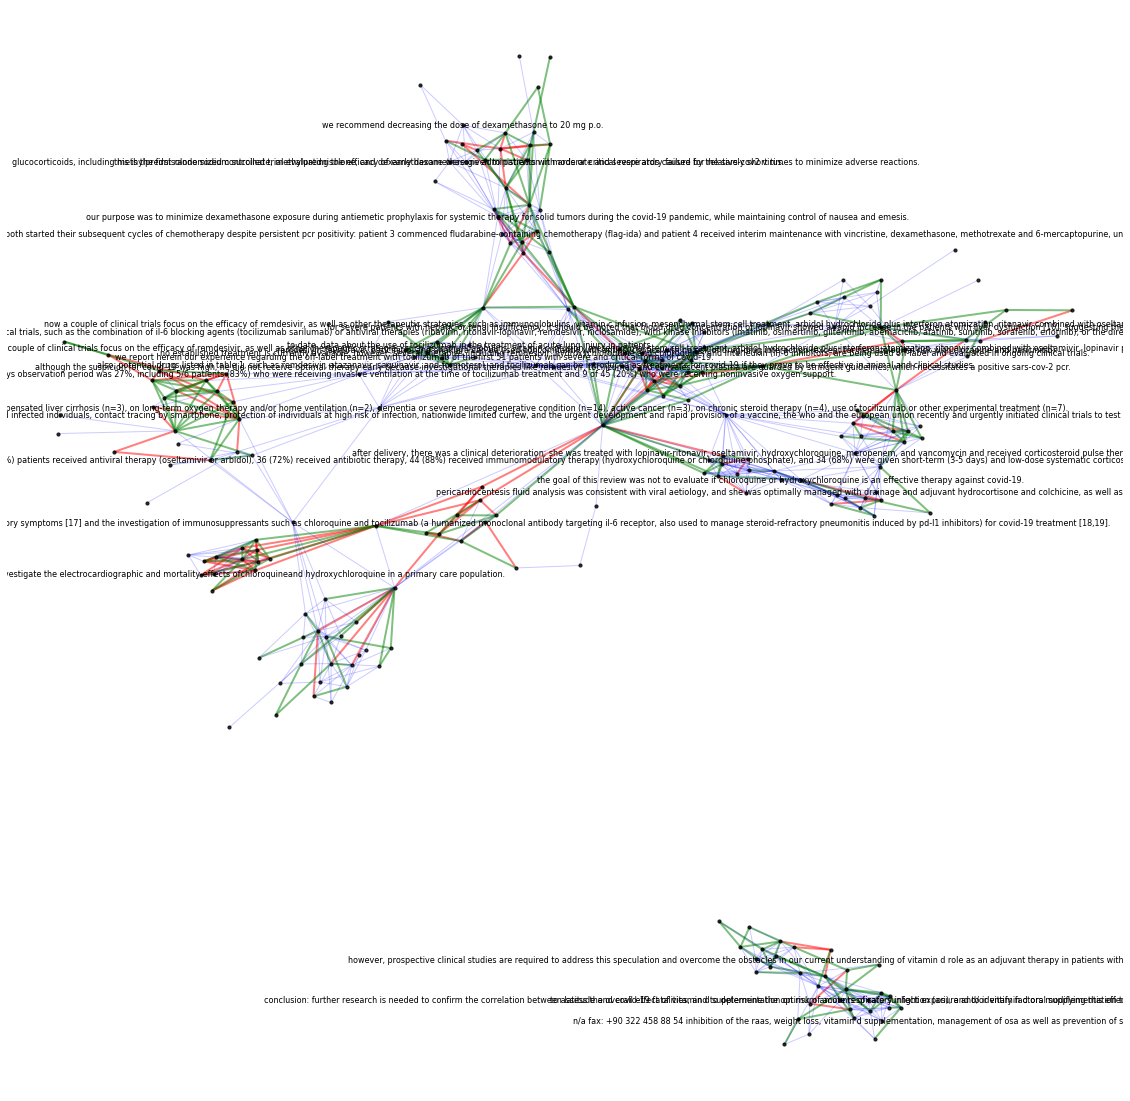

In [59]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('figure', figsize=(20, 20))


#G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

e_con=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == "contradiction"]
e_neu=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == "neutral"]
e_ent=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == "entailment"]

# nodes
nx.draw_networkx_nodes(G,pos,node_color='black',node_size=10, alpha=0.8)

# edges
nx.draw_networkx_edges(G, pos, edgelist=e_con, edge_color='r', width=2.0, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=e_ent, edge_color='g', width=2.0, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=e_neu, edge_color='b', width=1.0, alpha=0.2)

# labels
nx.draw_networkx_labels(G, pos, subset_labels, font_size=8)

#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
#                       width=8,alpha=0.5,edge_color='r')
#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
#                       width=8,alpha=0.5,edge_color='b')

plt.savefig("/Users/dnsosa/Desktop/tryingToSeeAllLabels.eps", format="eps")
plt.axis('off')
plt.show() # display

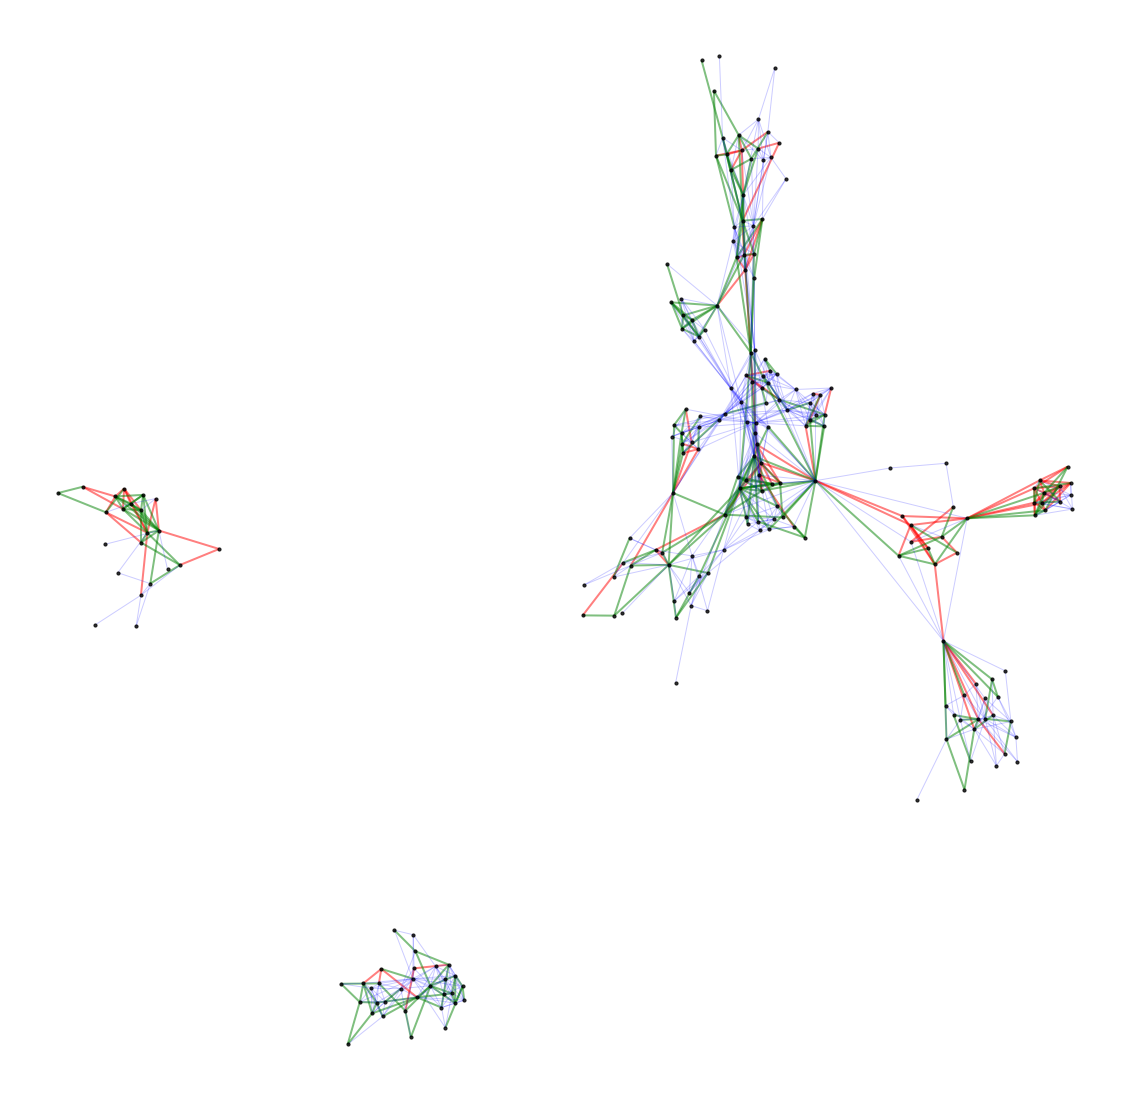

In [68]:
# Removing those 3 nodes:
list(G.nodes)

subs = ["heart failure as main cause of arf (n=2)",
        "respiratory symptoms [17]", 
        "who were receiving invasive ventilation at the time of tocilizumab treatment and 9 of 45"]

exclude_list = {sub:node for sub in subs for node in list(G.nodes) if sub in node}
exclude_list = list(exclude_list.values())

G.remove_nodes_from(exclude_list)


#G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

e_con=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == "contradiction"]
e_neu=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == "neutral"]
e_ent=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == "entailment"]

# nodes
nx.draw_networkx_nodes(G,pos,node_color='black',node_size=10, alpha=0.8)

# edges
nx.draw_networkx_edges(G, pos, edgelist=e_con, edge_color='r', width=2.0, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=e_ent, edge_color='g', width=2.0, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=e_neu, edge_color='b', width=1.0, alpha=0.2)

# labels
## nx.draw_networkx_labels(G, pos, subset_labels, font_size=8)

### plt.savefig("/Users/dnsosa/Desktop/tryingToSeeAllLabels.eps", format="eps")
plt.axis('off')
plt.show() # display


In [69]:
Gccs = sorted(nx.connected_components(G), key=len, reverse=True)
G_test = nx.union(G.subgraph(Gccs[1]), G.subgraph(Gccs[2]))
test_edges = G_test.edges()


In [71]:
print(len(test_edges))

187


In [80]:
Glcc = G.subgraph(max(nx.connected_components(G), key=len))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

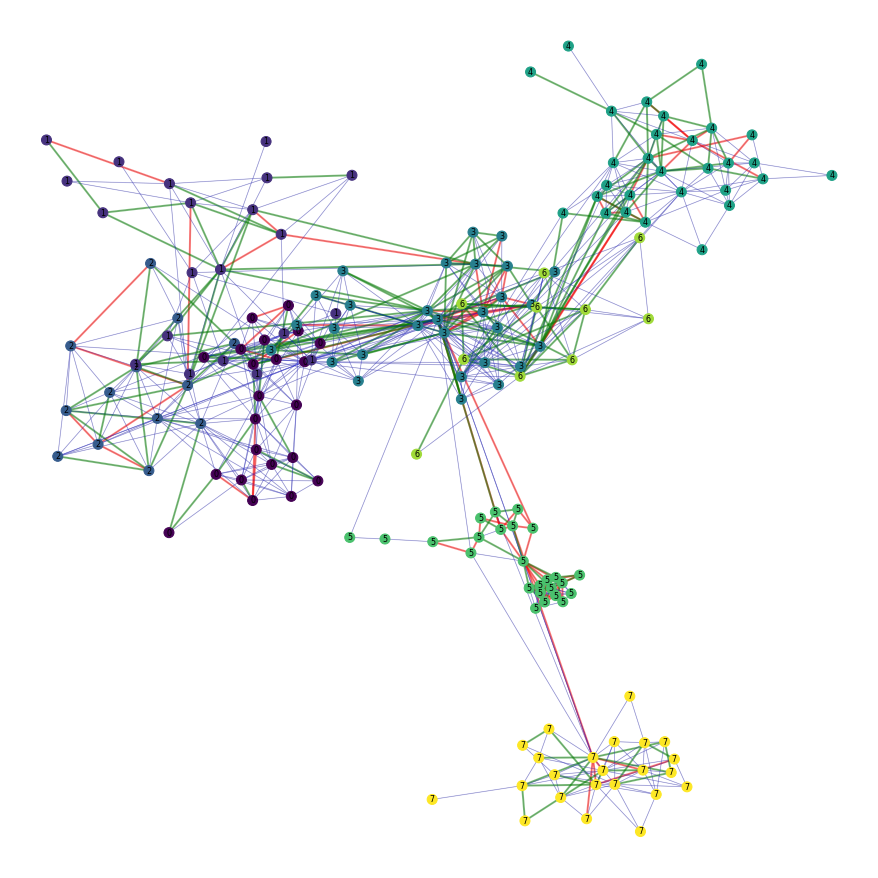

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test():
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    ##g = nx.karate_club_graph()
    partition = community_louvain.best_partition(Glcc)
    pos = community_layout(Glcc, partition)
    e_con=[(u,v) for (u,v,d) in Glcc.edges(data=True) if d['label'] == "contradiction"]
    e_neu=[(u,v) for (u,v,d) in Glcc.edges(data=True) if d['label'] == "neutral"]
    e_ent=[(u,v) for (u,v,d) in Glcc.edges(data=True) if d['label'] == "entailment"]

    nx.draw(Glcc, pos, node_color=list(partition.values()), node_size=100, edge_color="#999999", width=.4); 
    nx.draw_networkx_labels(G, pos, partition, font_size=8)
    nx.draw_networkx_edges(G, pos, edgelist=e_con, edge_color='r', width=2.0, alpha=0.5)
    nx.draw_networkx_edges(G, pos, edgelist=e_ent, edge_color='g', width=2.0, alpha=0.5)
    nx.draw_networkx_edges(G, pos, edgelist=e_neu, edge_color='b', width=1.0, alpha=0.2)

    plt.savefig("/Users/dnsosa/Desktop/clustered_lcc.eps", format="eps")
    plt.show()
    return partition

matplotlib.rc('figure', figsize=(12, 12))

partition = test()

In [109]:
# 7,5 (val);   1,2,3 (train);    6,4 (eval);

train_set = set()
val_set = set()
eval_set = set()

for node in Glcc.nodes():
    np = partition[node]
    if np in (1,2,3):
        train_set.add(node)
    elif np in (5,7):
        val_set.add(node)
    elif np in (4,6): 
        eval_set.add(node)
        

In [126]:
print(len(train_set))
print(len(val_set))
print(len(eval_set))

G_train = Glcc.subgraph(train_set)
G_val = Glcc.subgraph(val_set)
G_eval = Glcc.subgraph(eval_set)

print(G_train.number_of_edges())
print(G_val.number_of_edges())
print(G_eval.number_of_edges())
print(G_test.number_of_edges())

def get_type_counts(g):
    labs = list(nx.get_edge_attributes(g, 'label').values())
    
    freq = {} 
    for items in labs: 
        freq[items] = labs.count(items) 

    for key, value in freq.items(): 
        print (key, value)
        
print("\nTrain:")
get_type_counts(G_train)

print("\nVal:")
get_type_counts(G_val)

print("\nEval")
get_type_counts(G_eval)

print("\nTest")
get_type_counts(G_test)

# total: 754

63
48
39
268
157
142
187

Train:
neutral 168
entailment 76
contradiction 24

Val:
neutral 75
entailment 41
contradiction 41

Eval
neutral 79
entailment 48
contradiction 15

Test
entailment 66
neutral 100
contradiction 21


In [136]:
pd_train = nx.to_pandas_edgelist(G_train, source="text1", target="text2").rename(columns={"label": "annotation"})
pd_val = nx.to_pandas_edgelist(G_val, source="text1", target="text2").rename(columns={"label": "annotation"})
pd_eval = nx.to_pandas_edgelist(G_eval, source="text1", target="text2").rename(columns={"label": "annotation"})
pd_test = nx.to_pandas_edgelist(G_test, source="text1", target="text2").rename(columns={"label": "annotation"})


,text1,text2,annotation
0,qt prolongation should be considered when usin...,conclusions therapeutic regimens of ifn- + lo...,neutral
1,qt prolongation should be considered when usin...,"for instance, ritonavir and lopinavir are beli...",neutral
2,qt prolongation should be considered when usin...,for severe patients with hepatic or renal insu...,neutral
3,qt prolongation should be considered when usin...,conclusion this study revealed the beneficial ...,neutral
4,qt prolongation should be considered when usin...,now a couple of clinical trials focus on the e...,neutral
5,clinical trials on promising regimens for covi...,the role of convalescent plasma transfusion an...,neutral
6,clinical trials on promising regimens for covi...,"remdesivir, an adenosine analog that incorpora...",entailment
7,clinical trials on promising regimens for covi...,hydroxychloroquine was administered relatively...,neutral
8,clinical trials on promising regimens for covi...,arabi and colleagues initiated a placebo-contr...,neutral
9,clinical trials on promising regimens for covi...,expectation mainly comes from evidences that r...,neutral


In [138]:
import pandas as pd
import xlsxwriter

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('/Users/dnsosa/Desktop/Roam_annotations_trainvaltest_split.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
pd_train.to_excel(writer, sheet_name='Train')
pd_val.to_excel(writer, sheet_name='Val')
pd_eval.to_excel(writer, sheet_name='Eval')
pd_test.to_excel(writer, sheet_name='Test')

### CHANGE FROM LABEL TO ANNOTATION

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [100]:
partition

{'chloroquine has been recommended by some authors to be used for the treatment of patients infected with this virus however chloroquine may have side effects and drug resistance problems.': 0,
 "on the basis of hydroxychloroquine's superior antiviral and prophylactic activity, as well as its more tolerable safety profile in comparison to chloroquine, we believe that hydroxychloroquine may be a promising drug for the treatment of sars-cov-2 infection [24] .": 0,
 '15 our regression model identified age as a determinant in responsiveness to lopinavir/ritonavir, with efficacy being related to younger ages.': 1,
 'these findings formed the basis of a recent randomized clinical treatment trial which showed that the triple combination of antiviral therapy with ifn -1b, lopinavirritonavir, and ribavirin is safe and highly effective in shortening the duration of virus shedding, decreasing cytokine responses, alleviating symptoms, and facilitating the discharge of patients with mild to moderat

In [65]:
print(G.number_of_edges())
print(G.number_of_nodes())

956
229


In [18]:
import cvxpy as cp
import cvxopt
import gurobipy
import numpy as np

n_E = G.number_of_edges()

idx2edge = {}
edge2idx = {}
i = 0
for edge in G.edges():
    idx2edge[i] = edge
    edge2idx[edge] = i
    i += 1

f_R = .5  # fraction train
f_L = .25  # fraction val
f_T = .25  # fraction test

x_R = cp.Variable(n_E, boolean=True) # indicator that x_ij got assigned to Train
x_L = cp.Variable(n_E, boolean=True) # indicator that x_ij got assigned to Val
x_T = cp.Variable(n_E, boolean=True) # indicator that x_ij got assigned to Test
y = cp.Variable((n_E, n_E), boolean=True) # indicator that two adjacent edges, e_ij and e_kl, are assigned to diff groups

constraints = []

# All edges assigned to exaclty one group:
constraints += [x_R + x_L + x_T == np.ones(n_E)]

# Each group has fixed size
n_R = np.floor(f_R * n_E)
n_L = np.floor(f_L * n_E)
n_T = n_E - n_R - n_L

constraints += [
    cp.sum(x_R) == n_R,
    cp.sum(x_L) == n_L,
    cp.sum(x_T) == n_T
]

ct = 0
# Y is updated based on the group assignments
for ij in G.edges():
    for kl in G.edges():
        if len(set([ij[0], ij[1], kl[0], kl[1]])) == 3: # Are these two edges adjacent? 
            
            ct += 1
            ij_idx = edge2idx[ij]
            kl_idx = edge2idx[kl]
            
            # New equations to add
            constraints += [
                x_R[ij_idx] - x_R[kl_idx] <= y[ij_idx, kl_idx],
                x_R[kl_idx] - x_R[ij_idx] <= y[ij_idx, kl_idx],
                x_L[ij_idx] - x_L[kl_idx] <= y[ij_idx, kl_idx],
                x_L[kl_idx] - x_L[ij_idx] <= y[ij_idx, kl_idx],
                x_T[ij_idx] - x_T[kl_idx] <= y[ij_idx, kl_idx],
                x_T[kl_idx] - x_T[ij_idx] <= y[ij_idx, kl_idx]
            ]
            
objective = cp.Minimize(cp.sum(y))
prob = cp.Problem(objective, constraints)

print(ct)

19586


In [ ]:
print(cp.installed_solvers())

#prob.solve(solver = "GLPK_MI")
prob.solve(solver = "GUROBI")

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'GUROBI', 'OSQP', 'SCS']
Using license file /Users/dnsosa/gurobi.lic
Academic license - for non-commercial use only - expires 2021-02-06


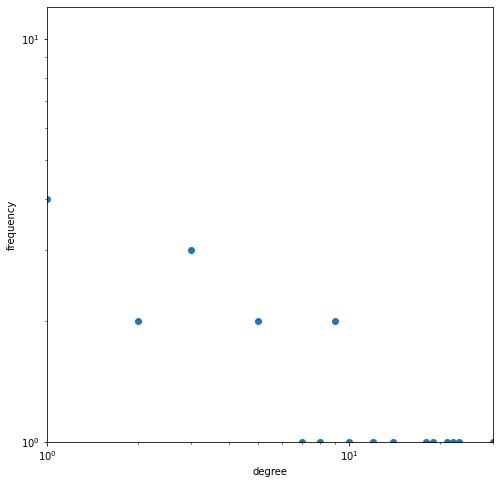

In [28]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

# G = some networkx graph

matplotlib.rc('figure', figsize=(8, 8))

degrees = nx.degree_histogram(G)
degree_counts = Counter(degrees)                                                                                                 
x, y = zip(*degree_counts.items())                                                      

plt.figure(1)   

# prep axes                                                                                                                      
plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(x))  

plt.ylabel('frequency')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                     # do plot                                                                                                                        
plt.scatter(x, y, marker='o')                                                                                                    
plt.show()

In [32]:
import numpy as np
np.median(degrees)

2.5

In [19]:
# THE RELAXATION!!
import cvxpy as cp
import cvxopt
import numpy as np

n_E = G.number_of_edges()

idx2edge = {}
edge2idx = {}
i = 0
for edge in G.edges():
    idx2edge[i] = edge
    edge2idx[edge] = i
    i += 1

f_R = .5  # fraction train
f_L = .25  # fraction val
f_T = .25  # fraction test

x_R = cp.Variable(n_E) # indicator that x_ij got assigned to Train
x_L = cp.Variable(n_E) # indicator that x_ij got assigned to Val
x_T = cp.Variable(n_E) # indicator that x_ij got assigned to Test
y = cp.Variable((n_E, n_E)) # indicator that two adjacent edges, e_ij and e_kl, are assigned to diff groups

constraints = []

# All edges assigned to exaclty one group:
constraints += [x_R + x_L + x_T == np.ones(n_E)]

# Each group has fixed size
n_R = np.floor(f_R * n_E)
n_L = np.floor(f_L * n_E)
n_T = n_E - n_R - n_L

constraints += [
    cp.sum(x_R) == n_R,
    cp.sum(x_L) == n_L,
    cp.sum(x_T) == n_T
]

ct = 0
# Y is updated based on the group assignments
for ij in G.edges():
    for kl in G.edges():
        if len(set([ij[0], ij[1], kl[0], kl[1]])) == 3: # Are these two edges adjacent? 
            
            ct += 1
            ij_idx = edge2idx[ij]
            kl_idx = edge2idx[kl]
            
            # New equations to add
            constraints += [
                x_R[ij_idx] - x_R[kl_idx] <= y[ij_idx, kl_idx],
                x_R[kl_idx] - x_R[ij_idx] <= y[ij_idx, kl_idx],
                x_L[ij_idx] - x_L[kl_idx] <= y[ij_idx, kl_idx],
                x_L[kl_idx] - x_L[ij_idx] <= y[ij_idx, kl_idx],
                x_T[ij_idx] - x_T[kl_idx] <= y[ij_idx, kl_idx],
                x_T[kl_idx] - x_T[ij_idx] <= y[ij_idx, kl_idx]
            ]
            
# Range of permissible assignments (relaxation)
constraints += [
    x_R <= np.ones(n_E),
    x_R >= np.zeros(n_E),
    x_L <= np.ones(n_E),
    x_L >= np.zeros(n_E),
    x_T <= np.ones(n_E),
    x_T >= np.zeros(n_E),
    y <= np.ones((n_E, n_E)),
    y >= np.zeros((n_E, n_E))
]

objective = cp.Minimize(cp.sum(y))
prob = cp.Problem(objective, constraints)

print(ct)

19586


In [20]:
##prob.solve(solver = "GLPK_MI")

prob.solve()

-4.1023384232315954e-09

In [21]:
if prob.status not in ["infeasible", "unbounded"]:
    # Otherwise, problem.value is inf or -inf, respectively.
    print("Optimal value: %s" % prob.value)
for variable in prob.variables():
    print("Variable %s: value %s" % (variable.name(), variable.value))

Optimal value: -4.1023384232315954e-09
Variable var3408081: value [[-4.58894994e-15  7.95863684e-17  1.04219769e-16 ... -4.58894994e-15
  -4.58894994e-15 -4.58894994e-15]
 [ 8.04814857e-17 -4.58894994e-15  8.03776883e-17 ... -4.58894994e-15
  -4.58894994e-15 -4.58894994e-15]
 [ 1.04255833e-16  1.04183514e-16 -4.58894994e-15 ... -4.58894994e-15
  -4.58894994e-15 -4.58894994e-15]
 ...
 [-4.58894994e-15 -4.58894994e-15 -4.58894994e-15 ... -4.58894994e-15
  -4.58894994e-15 -4.58894994e-15]
 [-4.58894994e-15 -4.58894994e-15 -4.58894994e-15 ... -4.58894994e-15
  -4.58894994e-15 -4.58894994e-15]
 [-4.58894994e-15 -4.58894994e-15 -4.58894994e-15 ... -4.58894994e-15
  -4.58894994e-15 -4.58894994e-15]]
Variable var3408078: value [0.49999846 0.49999846 0.49999846 0.49999846 0.49999846 0.49999846
 0.49999846 0.49999846 0.49999846 0.49999846 0.49999846 0.49999846
 0.49999846 0.49999846 0.49999846 0.49999846 0.49999846 0.49999846
 0.49999846 0.49999846 0.49999846 0.49999846 0.49999846 0.49999846
 0.

826

956

In [44]:
###og_prob = prob

In [96]:
frac = .2
G = nx.barabasi_albert_graph(int(np.floor(229 * frac)), 3)
#G = nx.watts_strogatz_graph(int(np.floor(229 * frac)), 3, .5)

In [97]:
%%time
# FIGURING OUT RUNTIME WITH RANDOM NETWORKS

import cvxpy as cp
import cvxopt
import gurobipy
import numpy as np

n_E = G.number_of_edges()

idx2edge = {}
edge2idx = {}
i = 0
for edge in G.edges():
    idx2edge[i] = edge
    edge2idx[edge] = i
    i += 1

f_R = .5  # fraction train
f_L = .25  # fraction val
f_T = .25  # fraction test

x_R = cp.Variable(n_E, boolean=True) # indicator that x_ij got assigned to Train
x_L = cp.Variable(n_E, boolean=True) # indicator that x_ij got assigned to Val
x_T = cp.Variable(n_E, boolean=True) # indicator that x_ij got assigned to Test
y = cp.Variable((n_E, n_E), boolean=True) # indicator that two adjacent edges, e_ij and e_kl, are assigned to diff groups

constraints = []

# All edges assigned to exaclty one group:
constraints += [x_R + x_L + x_T == np.ones(n_E)]

# Each group has fixed size
n_R = np.floor(f_R * n_E)
n_L = np.floor(f_L * n_E)
n_T = n_E - n_R - n_L

constraints += [
    cp.sum(x_R) == n_R,
    cp.sum(x_L) == n_L,
    cp.sum(x_T) == n_T
]

ct = 0
# Y is updated based on the group assignments
for ij in G.edges():
    for kl in G.edges():
        if len(set([ij[0], ij[1], kl[0], kl[1]])) == 3: # Are these two edges adjacent? 
            
            ct += 1
            ij_idx = edge2idx[ij]
            kl_idx = edge2idx[kl]
            
            # New equations to add
            constraints += [
                x_R[ij_idx] - x_R[kl_idx] <= y[ij_idx, kl_idx],
                x_R[kl_idx] - x_R[ij_idx] <= y[ij_idx, kl_idx],
                x_L[ij_idx] - x_L[kl_idx] <= y[ij_idx, kl_idx],
                x_L[kl_idx] - x_L[ij_idx] <= y[ij_idx, kl_idx],
                x_T[ij_idx] - x_T[kl_idx] <= y[ij_idx, kl_idx],
                x_T[kl_idx] - x_T[ij_idx] <= y[ij_idx, kl_idx]
            ]
            
objective = cp.Minimize(cp.sum(y))
prob = cp.Problem(objective, constraints)

print(ct)

print(cp.installed_solvers())

#prob.solve(solver = "GLPK_MI")
prob.solve(solver = "GUROBI")

1882
['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'GUROBI', 'OSQP', 'SCS']
CPU times: user 1d 15h 27min 17s, sys: 13min 53s, total: 1d 15h 41min 10s
Wall time: 3h 32min 23s


374.0

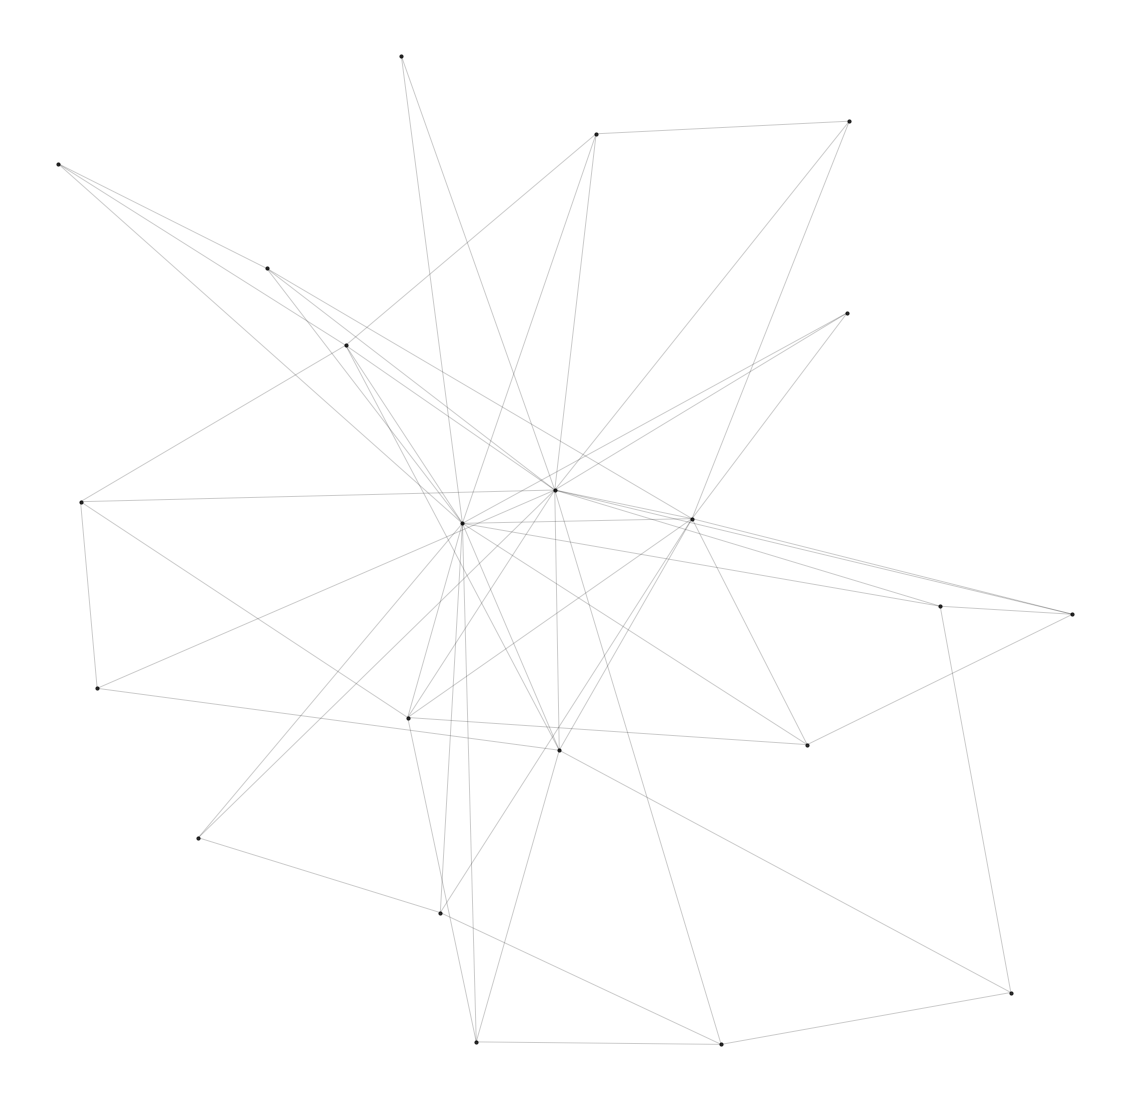

In [91]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('figure', figsize=(20, 20))


#G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_color='black',node_size=10, alpha=0.8)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
#                       width=8,alpha=0.5,edge_color='r')
#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
#                       width=8,alpha=0.5,edge_color='b')


plt.axis('off')
plt.show() # display

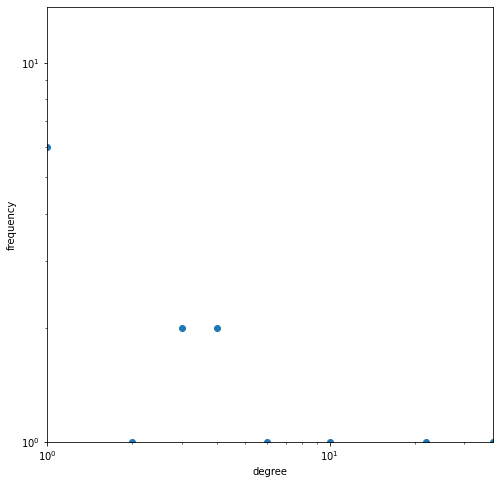

In [45]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

# G = some networkx graph

matplotlib.rc('figure', figsize=(8, 8))

degrees = nx.degree_histogram(G)
degree_counts = Counter(degrees)                                                                                                 
x, y = zip(*degree_counts.items())                                                      

plt.figure(1)   

# prep axes                                                                                                                      
plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(x))  

plt.ylabel('frequency')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                     # do plot                                                                                                                        
plt.scatter(x, y, marker='o')                                                                                                    
plt.show()

In [92]:
G.number_of_edges()

57

In [93]:
57 * 56 / 2

1596.0